# Image Segmentation and Cell Size Measurement
 

In [147]:
import numpy as np 
import pandas as pd 
import skimage.io 
import skimage.filters
import skimage.color
import scipy.ndimage
import scipy.interpolate
import scipy.signal
import size.viz 
import size.image
import size.analytical
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
import napari
import glob
import imp 
imp.reload(size.image)
cor, pal = size.viz.matplotlib_style()

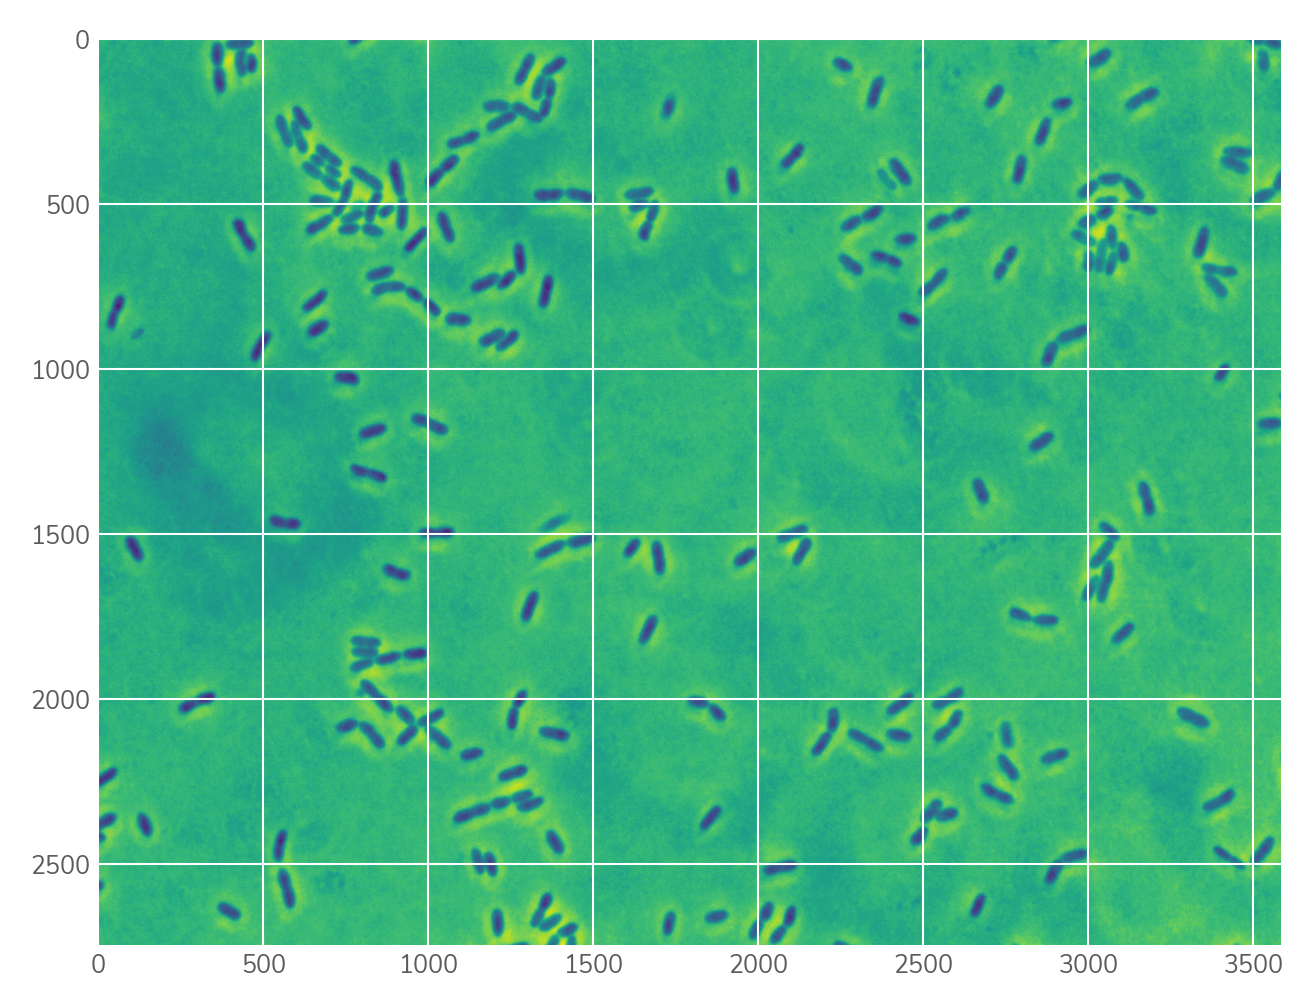

In [148]:
# Load images
files = glob.glob('../../data/images/test/*.tif')
ims = skimage.io.ImageCollection(files)
ims = [skimage.color.rgb2gray(im) for im in ims]
test_im = ims[-1]
crop = test_im#[1800:3000, 1800:]
crop = (crop - crop.min()) / (crop.max() - crop.min())
plt.imshow(crop)

In [245]:
filt = size.image.tophat_filter(crop)

In [250]:
# splines, sizes = [], []
# cell_ims, masks = [], []
imp.reload(size.image)
objs, mask, cells = size.image.contour_segmentation(filt, return_mask=True, 
                                                          return_cells=True,
                                                          filter=False,
                                                          area_bounds=(0.5, 5),
                                                          ecc_bound=0.75,
                                                          solidity_bound=0.9,
                                                          intensity_image=crop)


100%|██████████| 142/142 [00:01<00:00, 83.82it/s]


In [260]:
anatomy = size.image.assign_anatomy(objs, cap_radius=1)
biometrics = size.image.measure_biometrics(anatomy)
biometrics['cell'] = [cells[i]['intensity_image'] for i in biometrics['cell_id'].values]
# objs['image'] = i + 1
# anatomy['image'] = i+1
# biometrics['image'] = i + 1
# splines.append(anatomy
# sizes.append(biometrics) 
# masks.append(mask)
# cell_ims.append(cells)


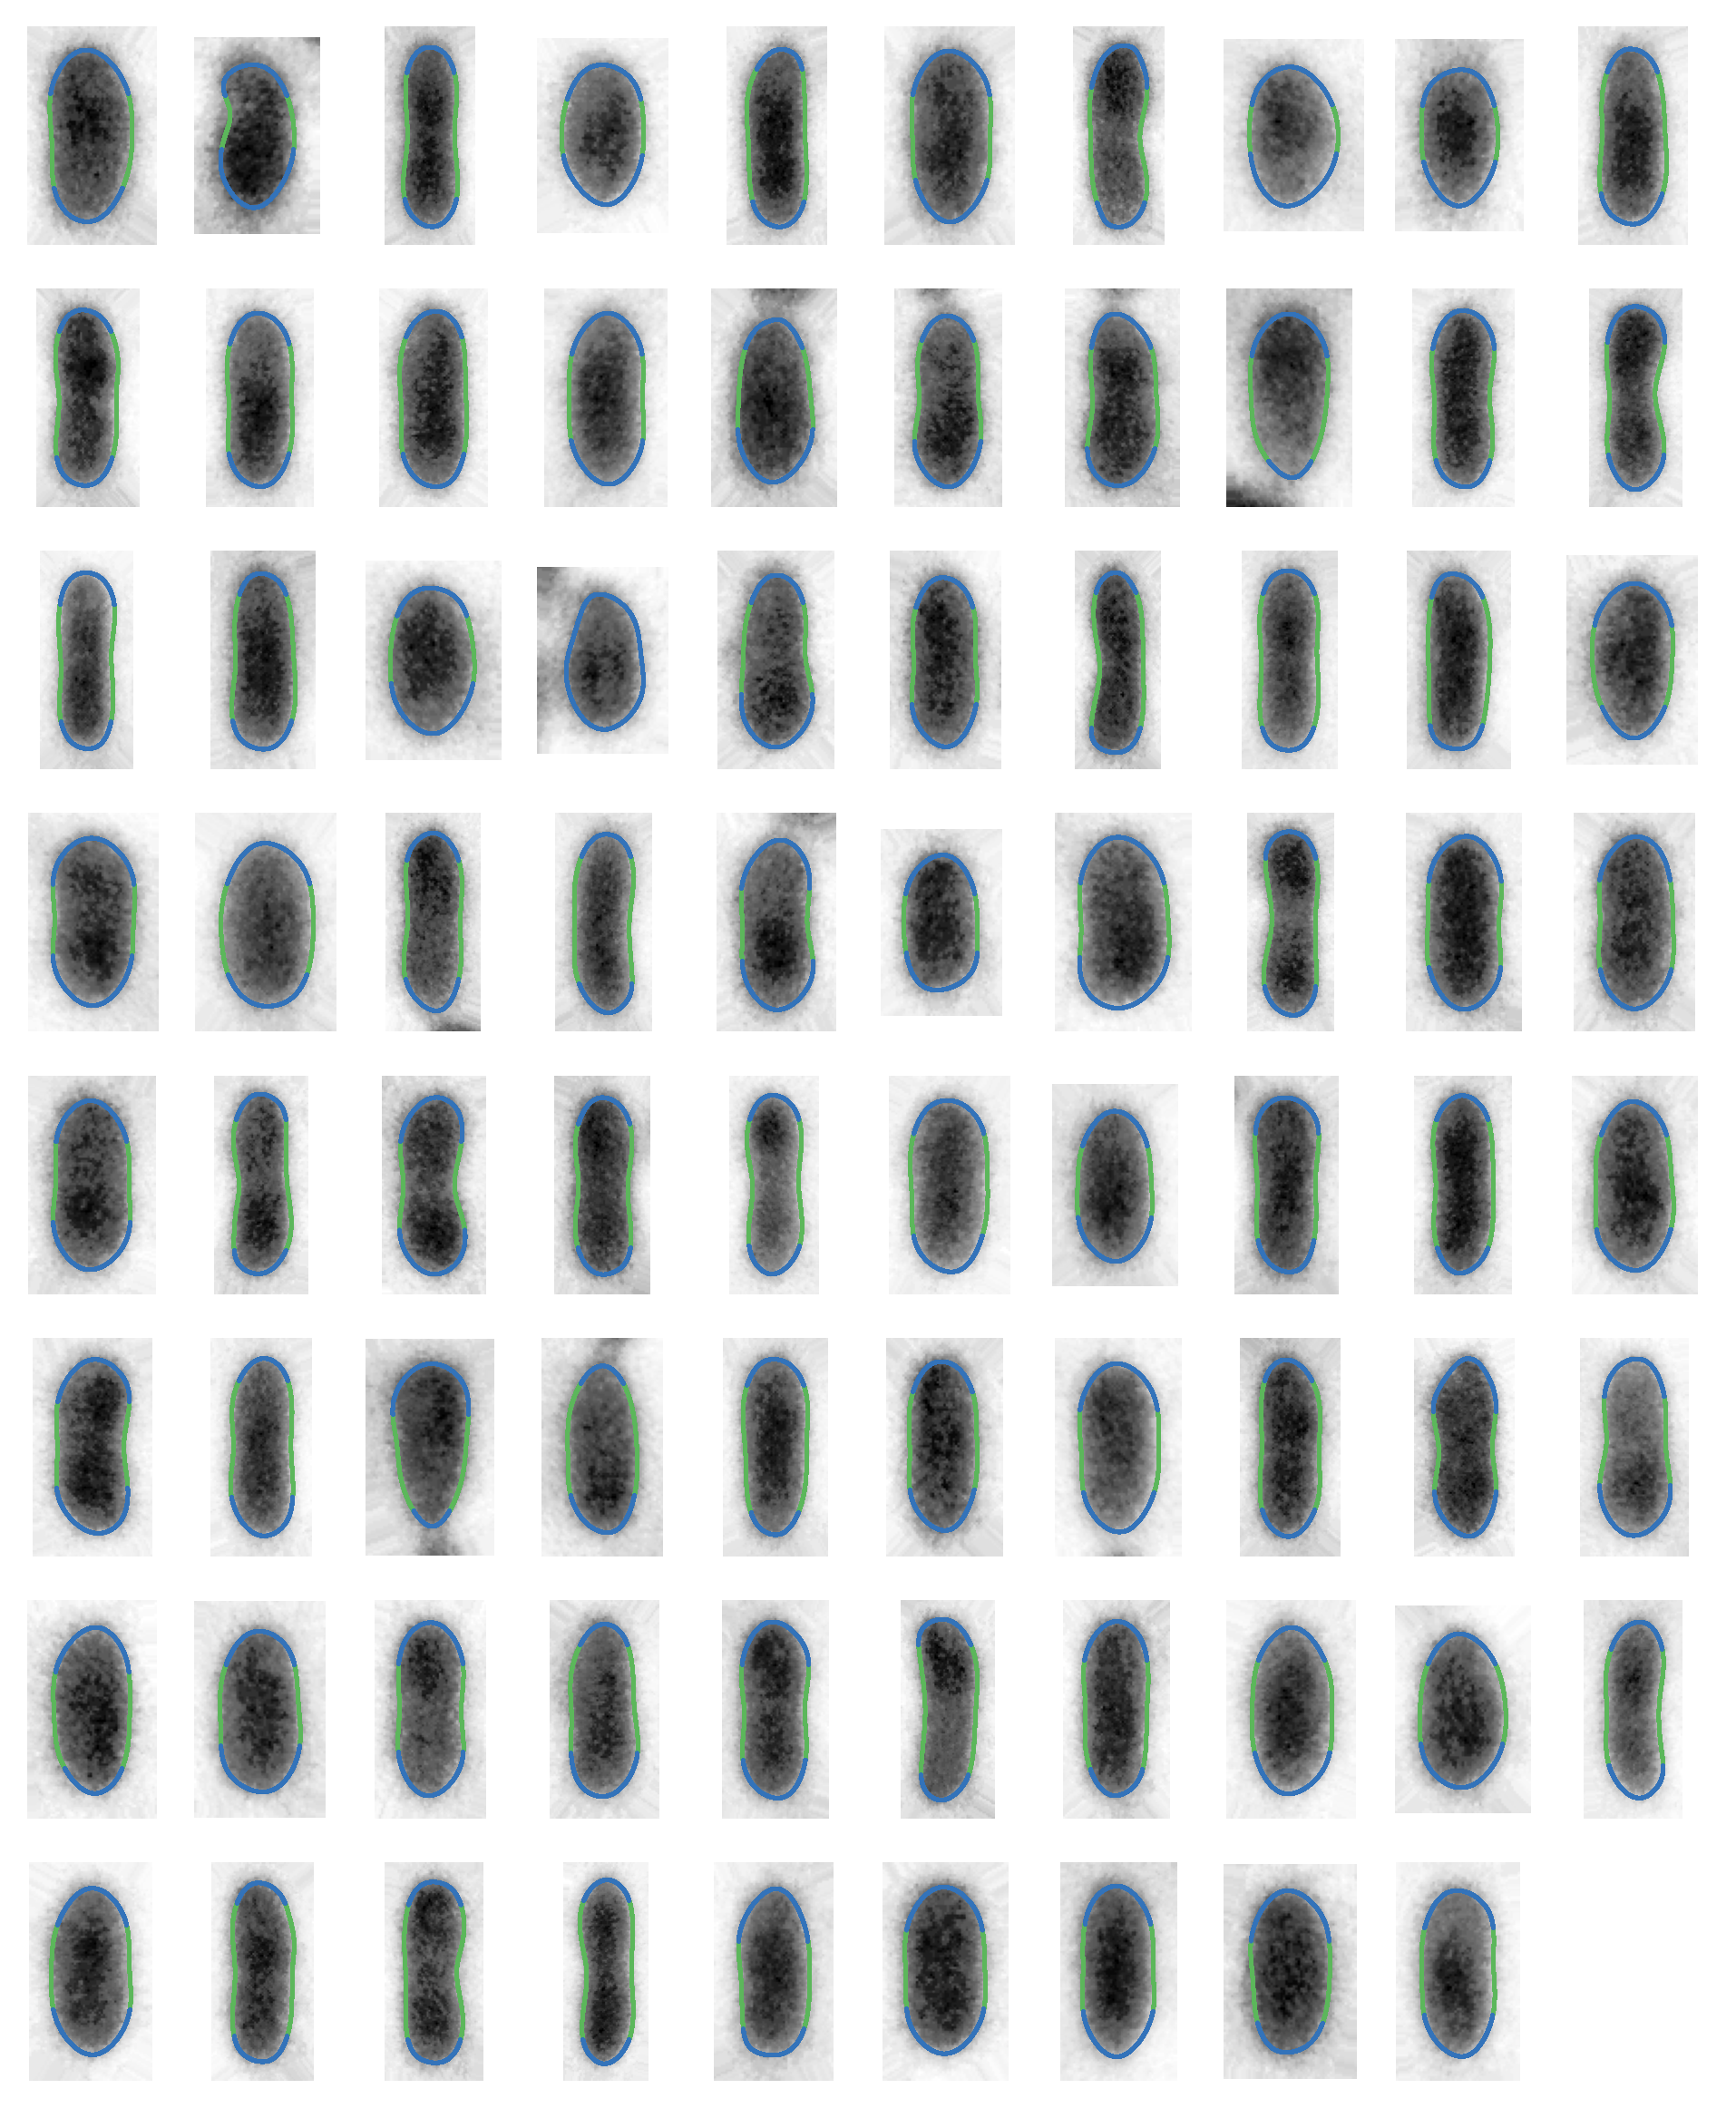

In [256]:
n_cells = len(cells)
n_cols = 10
n_rows = int(np.ceil(n_cells/n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 10), sharex=True)
ax = ax.ravel()
midplanes = []
for a in ax:
    a.axis('off')

for i, c in cells.items():
    ax[i].imshow(c['intensity_image'], cmap='Greys_r')

for g, d in anatomy.groupby(['cell_id']):
    sides = d[(d['component']=='left') | (d['component']=='right')]
    caps = d[(d['component']=='top') | (d['component']=='bottom')]
    ax[g].plot(sides['x_coords'], sides['y_coords'], '.', ms=2, color=cor['primary_green'],
            markeredgewidth=0)
    ax[g].plot(caps['x_coords'], caps['y_coords'], '.', ms=2, color=cor['primary_blue'],
            markeredgewidth=0)
    

In [261]:
biometrics

length  width_mean  width_var    volume  surface_area  \
0   2.381363    1.269781   0.000889  2.479609      9.499580   
0   1.851035    0.947086   0.000607  1.081616      5.507491   
0   3.171981    0.966557   0.000261  2.091020      9.631806   
0   1.808494    1.064443   0.000075  1.293611      6.047690   
0   3.057188    0.866689   0.000275  1.633158      8.324060   
..       ...         ...        ...       ...           ...   
0   2.310821    1.233770   0.000254  2.270975      8.956750   
0   2.236769    1.207361   0.000077  2.100092      8.484147   
0   2.516684    1.149448   0.000089  2.213953      9.087992   
0   2.092839    1.197379   0.000444  1.907186      7.872586   
0   2.180775    1.030030   0.000030  1.531090      7.056845   

    surface_to_volume  periplasm_volume  periplasm_fractional_volume  cell_id  \
0            3.831080          0.230386                     0.092912        0   
0            5.091912          0.132259                     0.122279        1   
0            4.606272          0.232735                     0.111302        2   
0            4.675046          0.145617                     0.112566        3   
0            5.096911          0.200462                     0.122745        4   
..                ...               ...                          ...      ...   
0            3.944010          0.217024                     0.095564       74   
0            4.039894          0.205407                     0.097808       75   
0            4.104872          0.220067                     0.099400       76   
0            4.127855          0.190420                     0.099843       77   
0            4.609033          0.170182                     0.111151       78   

                                                 cell  
0   [[0.6894409937888198, 0.6894409937888198, 0.69...  
0   [[0.7142857142857143, 0.7142857142857143, 0.71...  
0   [[0.7577639751552794, 0.7577639751552794, 0.77...  
0   [[0.732919254658385, 0.7453416149068322, 0.714...  
0   [[0.732919254658385, 0.7453416149068322, 0.745...  
..                                                ...  
0   [[0.7577639751552794, 0.7453416149068322, 0.74...  
0   [[0.6770186335403725, 0.6770186335403725, 0.66...  
0   [[0.732919254658385, 0.732919254658385, 0.7329...  
0   [[0.7142857142857143, 0.7142857142857143, 0.71...  
0   [[0.7577639751552794, 0.7453416149068322, 0.73...  

[78 rows x 10 columns]

In [ ]:
def cell_gallery(biometrics, 
                 anatomy,
                 cols=10,
                 max_rows=15):

    # Determine the total number of cells
    
    

x_coords   y_coords  curvature  cell_id component
0     22.579200  74.843356   0.196910       78       top
1     22.568778  74.844876   0.196949       78       top
2     22.558353  74.846375   0.196985       78       top
3     22.547926  74.847852   0.197019       78       top
4     22.537497  74.849307   0.197052       78       top
...         ...        ...        ...      ...       ...
9997  22.610452  74.838664   0.196782       78       top
9998  22.600037  74.840250   0.196827       78       top
423   18.128733  73.597608   0.108288       78      left
424   18.118534  73.590438   0.108055       78      left
9722  25.342528  73.596522   0.131822       78     right

[9997 rows x 5 columns]

In [178]:
anatomy.component.unique()

array(['top', 'bottom', 'left', 'right'], dtype=object)

/var/folders/sl/nj0m09b974n43bbv418vtmkr0000gp/T/ipykernel_64808/1362780225.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


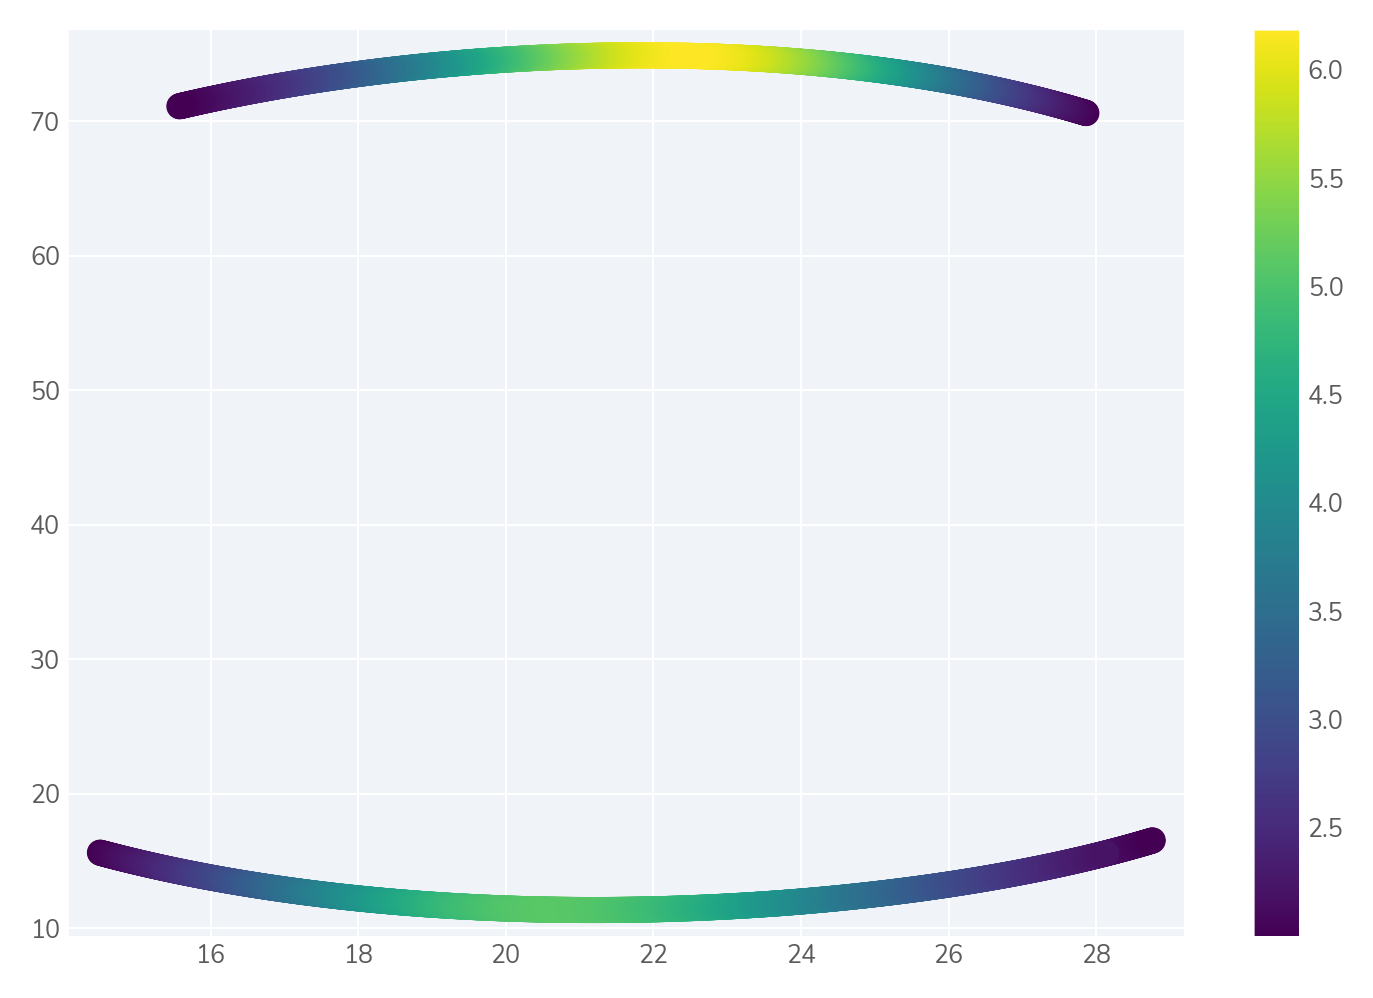

In [230]:

caps = d[d['curvature'] >= 2]
# plt.scatter(d['x_coords'], d['y_coords'], c=d['curvature'])
plt.scatter(caps['x_coords'], caps['y_coords'], c=caps['curvature'])
plt.colorbar()

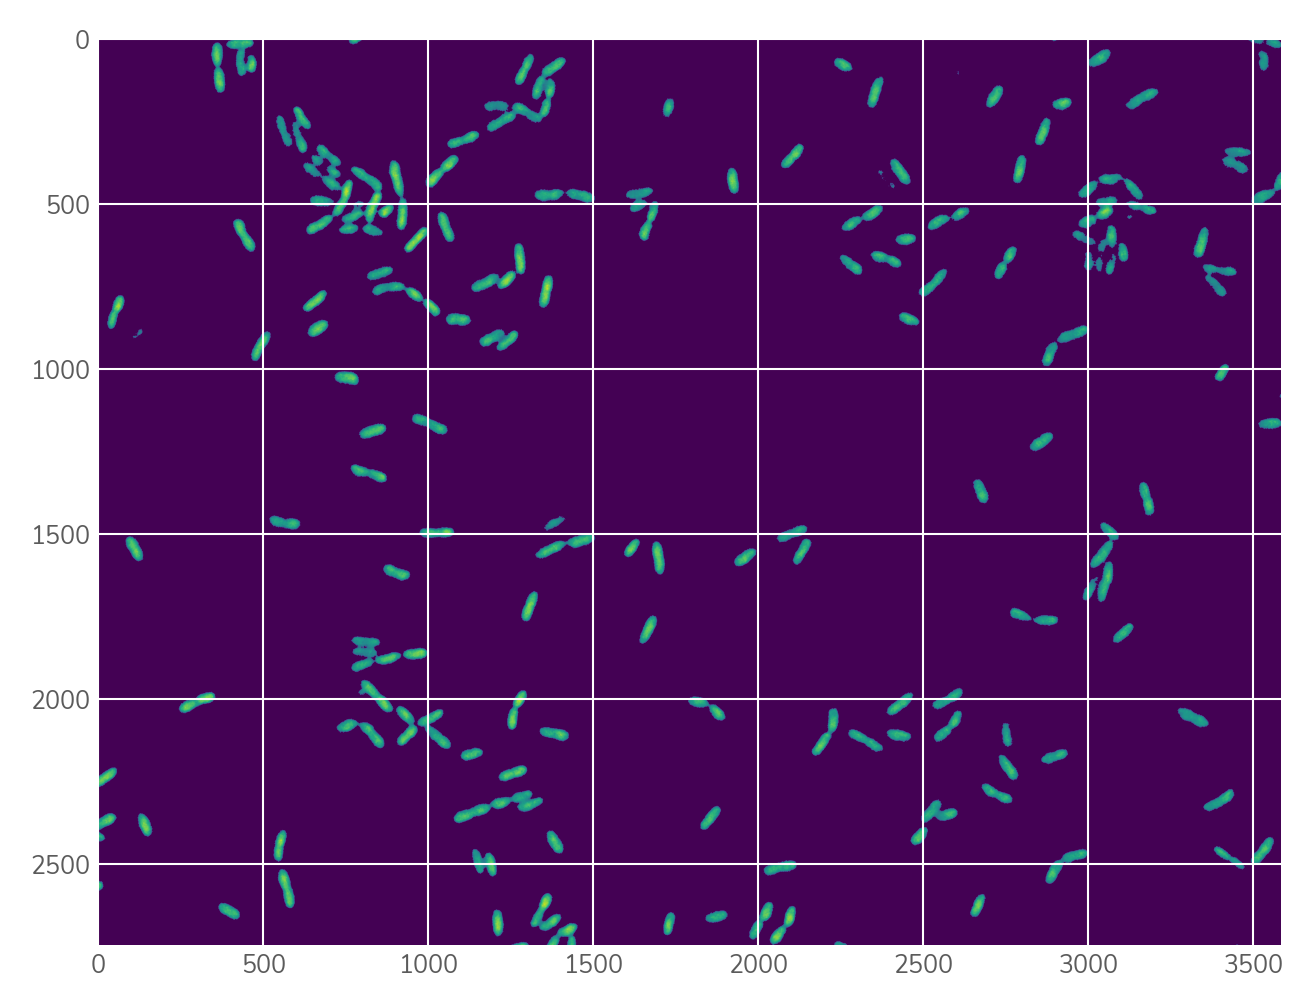

In [186]:
plt.imshow(filt)

In [261]:
kobjs

NameError: name 'kobjs' is not defined

In [ ]:
d

x_coords   y_coords  curvature  cell_id component
0     25.066653  87.345133   0.110576       51       top
1     25.052018  87.342536   0.110570       51       top
2     25.037388  87.339915   0.110563       51       top
3     25.022761  87.337270   0.110555       51       top
4     25.008139  87.334601   0.110546       51       top
...         ...        ...        ...      ...       ...
9318  35.192747  83.779493   0.049884       51     right
9319  35.178968  83.791604   0.049947       51     right
9320  35.165182  83.803698   0.050010       51     right
9321  35.151389  83.815776   0.050074       51     right
9322  35.137589  83.827838   0.050137       51     right

[9756 rows x 5 columns]

In [17]:
anatomy

x_coords   y_coords  curvature  cell_id component
0     23.260527  91.585297   0.070620        0       top
1     23.242686  91.579616   0.070634        0       top
2     23.224854  91.573912   0.070647        0       top
3     23.207031  91.568185   0.070661        0       top
4     23.189217  91.562434   0.070674        0       top
...         ...        ...        ...      ...       ...
9318  35.192747  83.779493   0.049884       51     right
9319  35.178968  83.791604   0.049947       51     right
9320  35.165182  83.803698   0.050010       51     right
9321  35.151389  83.815776   0.050074       51     right
9322  35.137589  83.827838   0.050137       51     right

[435528 rows x 5 columns]

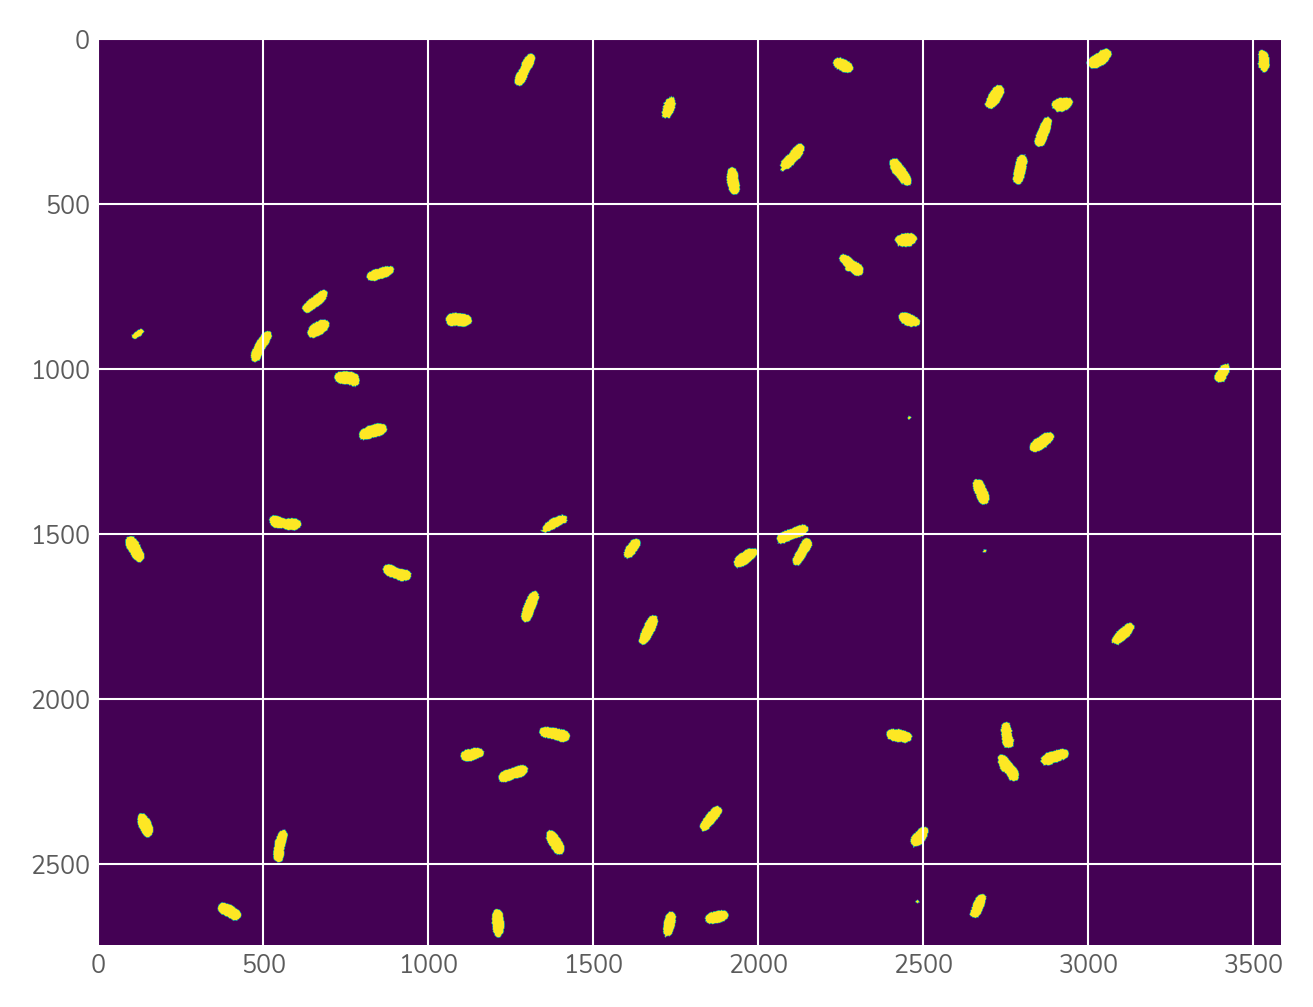

In [7]:
plt.imshow(mask)

In [5]:
# Set up the gallery
n_cells = len(sizes)
n_cols = 10
n_rows = int(np.ceil(n_cells/n_cols))
curve_low = 1/(0.5/0.0167)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 10))
ax = ax.ravel()
midplanes = []
for a in ax:
    a.axis('off')
for i, c in enumerate(cells):
    ax[i].imshow(c, cmap='Greys_r')
    cshape = np.shape(c) 
    ax[i].hlines(cshape[0]/2, 0, cshape[1], 'w', linewidth=0.25)
    ax[i].vlines(cshape[1]/2, 0, cshape[0], 'w', linewidth=0.25)
    midplanes.append(cshape[0]/2)
for g, d in contours.groupby('cell_id'):
    # Find the caps
    caps = d[(d['curvature'] >= curve_low)]
    max_x = d['spl_x'].max()
    max_y = d['spl_y'].max()
    # Find the lower cap boundary
    bottom_cap_bound = caps[caps['spl_y'] < (0.5 * max_y)]['spl_y'].max()
    upper_cap_bound = caps[caps['spl_y'] > (0.5 * max_y)]['spl_y'].min()
    sides = d[(d['spl_y'] > bottom_cap_bound) & (d['spl_y'] < upper_cap_bound)]
    # ax[g].plot(sides['spl_x'], sides['spl_y'], '.',color=cor['primary_blue'], ms=1, markeredgewidth=0) 
    ax[g].plot(caps['spl_x'], caps['spl_y'], '.',  color=cor['primary_blue'], ms=1, markeredgewidth=0) 
    ax[g].plot(sides['spl_x'], sides['spl_y'], '.',  color=cor['primary_green'], ms=1, markeredgewidth=0) 
    # ax[g].plot(d['spl_x'][0:1500], d['spl_y'][0:1500], 'w-')
plt.subplots_adjust(wspace=-0.7)
# plt.savefig('./segmentation_masks.pdf')

x_coords   y_coords  curvature  cell_id
0     26.130342  87.084965   0.075906        0
1     26.111840  87.084428   0.075919        0
2     26.093339  87.083866   0.075931        0
3     26.074841  87.083278   0.075944        0
4     26.056345  87.082664   0.075956        0
...         ...        ...        ...      ...
9994  27.627055  79.981740   0.123732       71
9995  27.613428  79.983122   0.123753       71
9996  27.599798  79.984481   0.123774       71
9997  27.586168  79.985817   0.123793       71
9998  27.572536  79.987129   0.123812       71

[719928 rows x 4 columns]

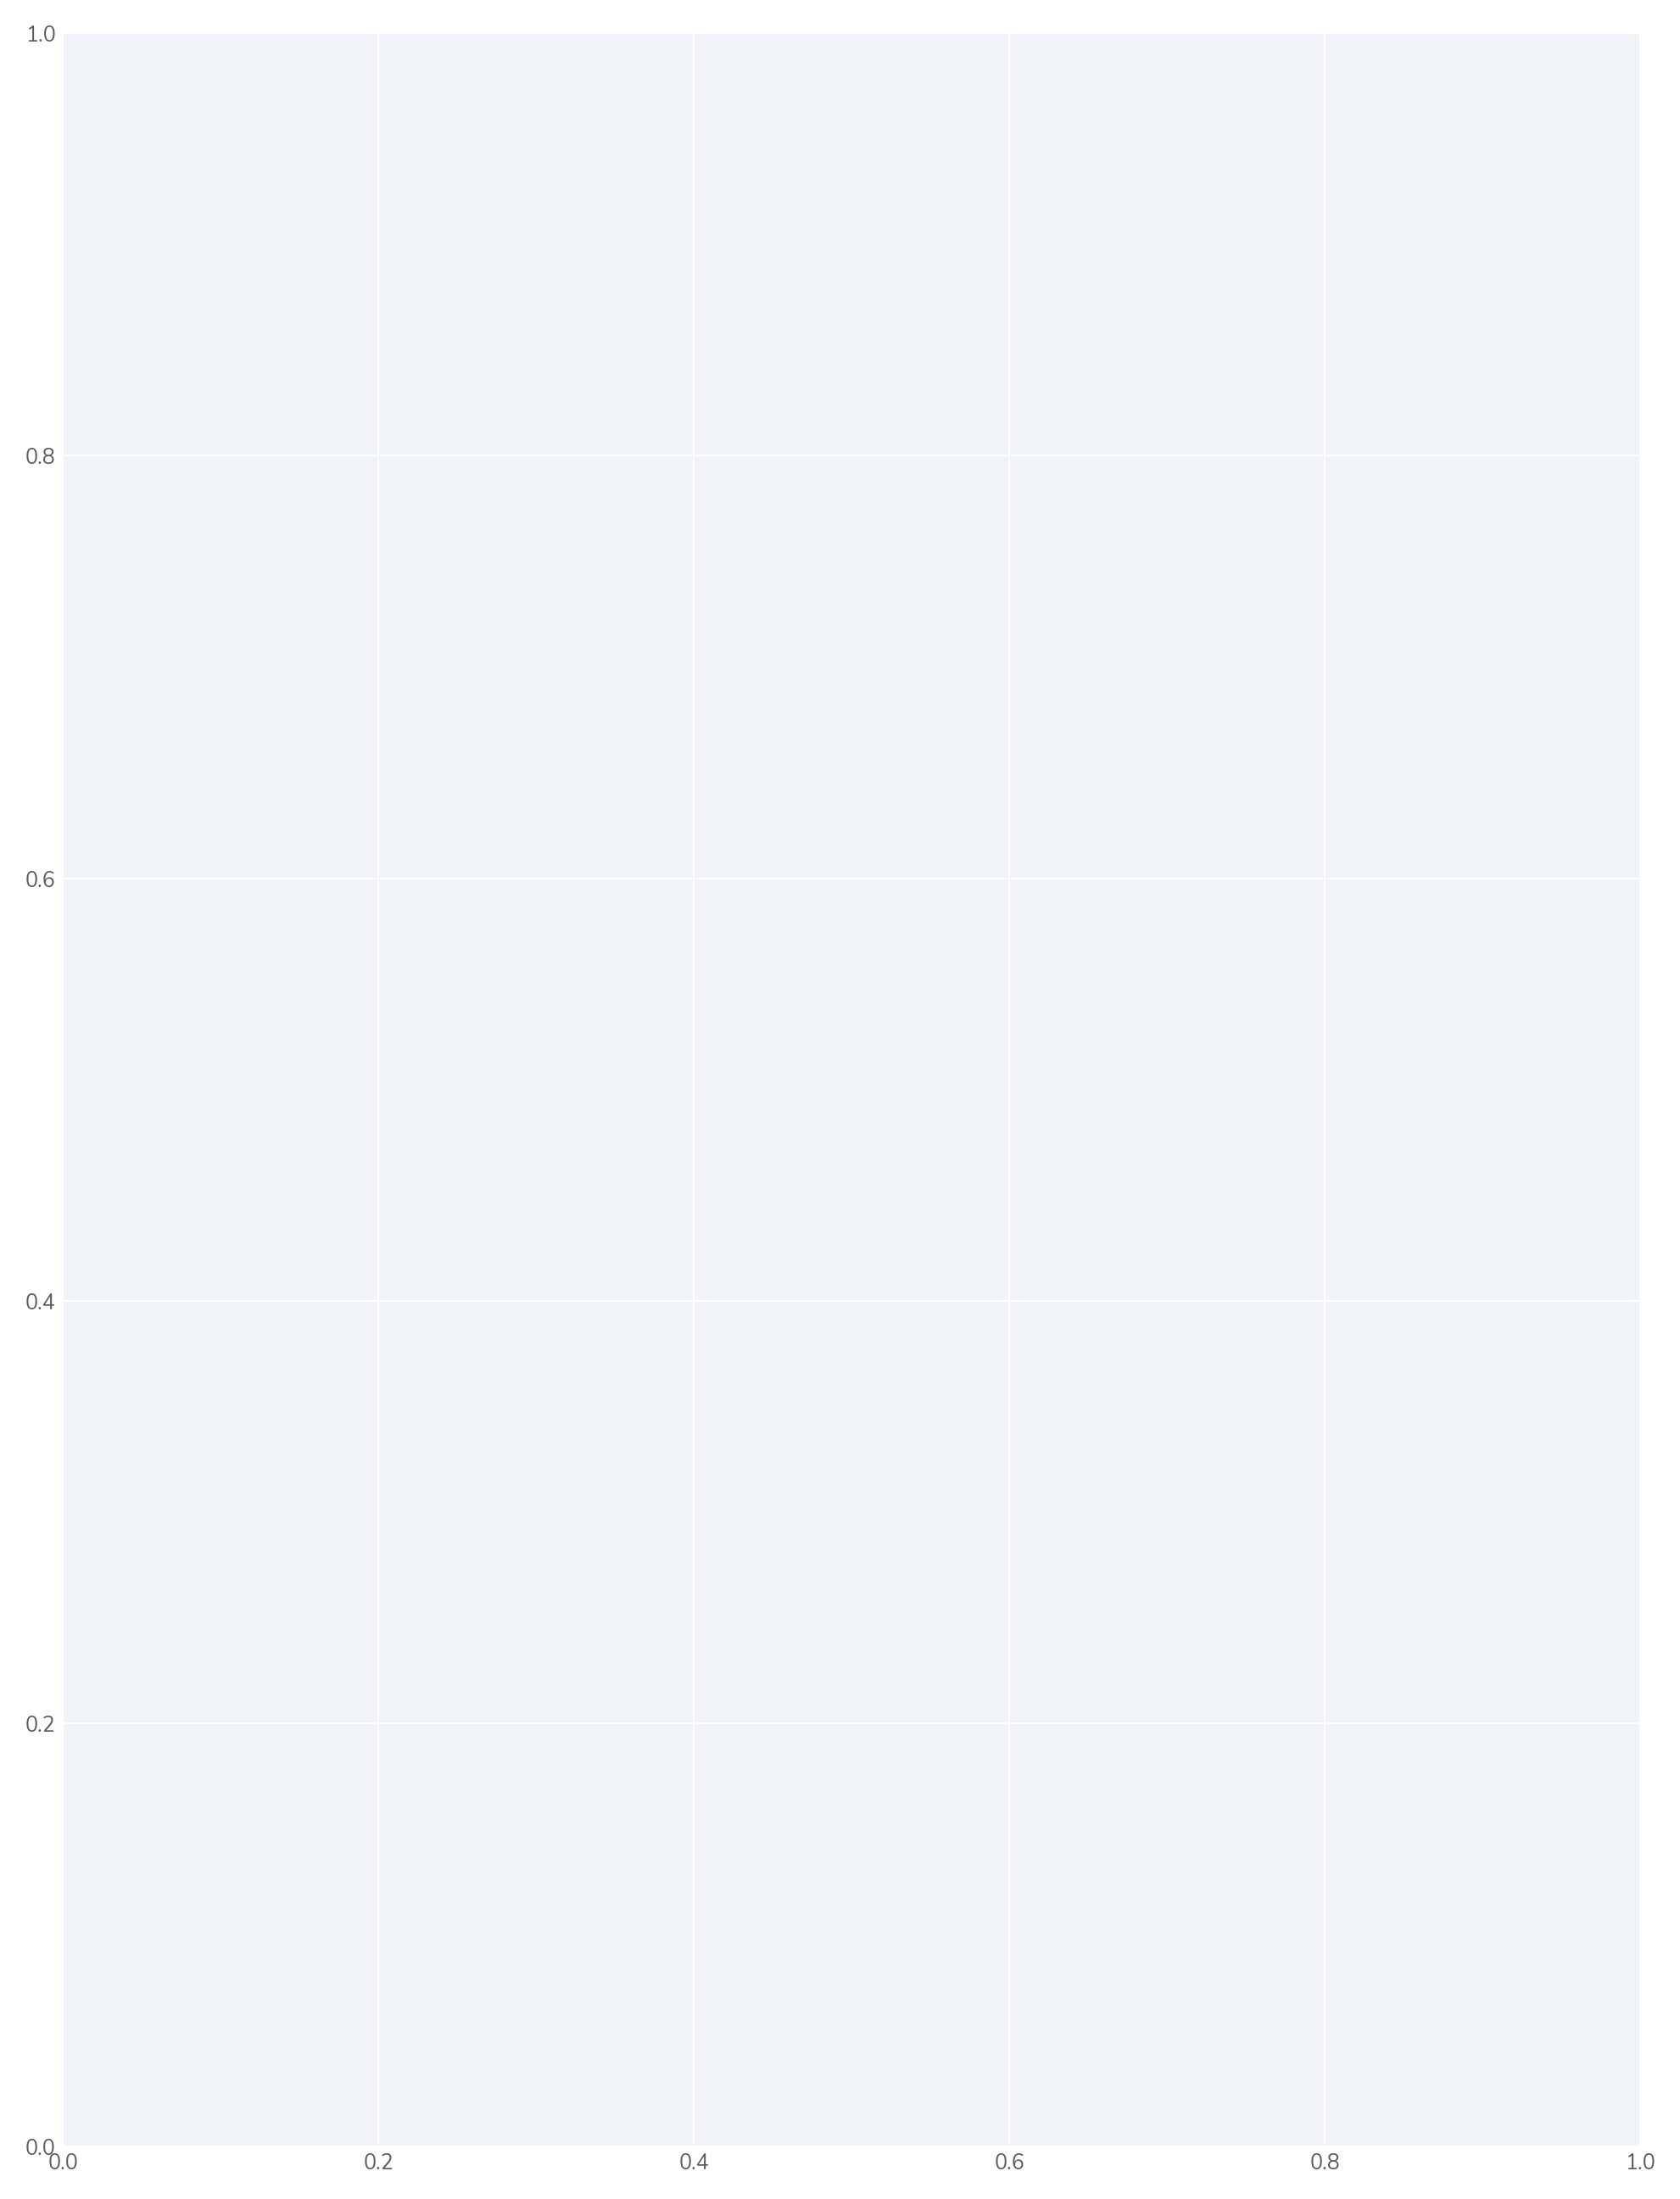

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8,11))

## Exploratory below

In [249]:
# # Normalize the image.
im_blur = skimage.filters.gaussian(crop, 30)
im_sub = crop - im_blur
lg_selem = skimage.morphology.disk(50)
sm_selem = skimage.morphology.disk(2)
blk_tophat = skimage.morphology.black_tophat(im_sub, lg_selem)
wht_tophat = skimage.morphology.white_tophat(blk_tophat, lg_selem)
closing = scipy.ndimage.grey_closing(wht_tophat, footprint=sm_selem)
plt.imshow(closing)

KeyboardInterrupt: 

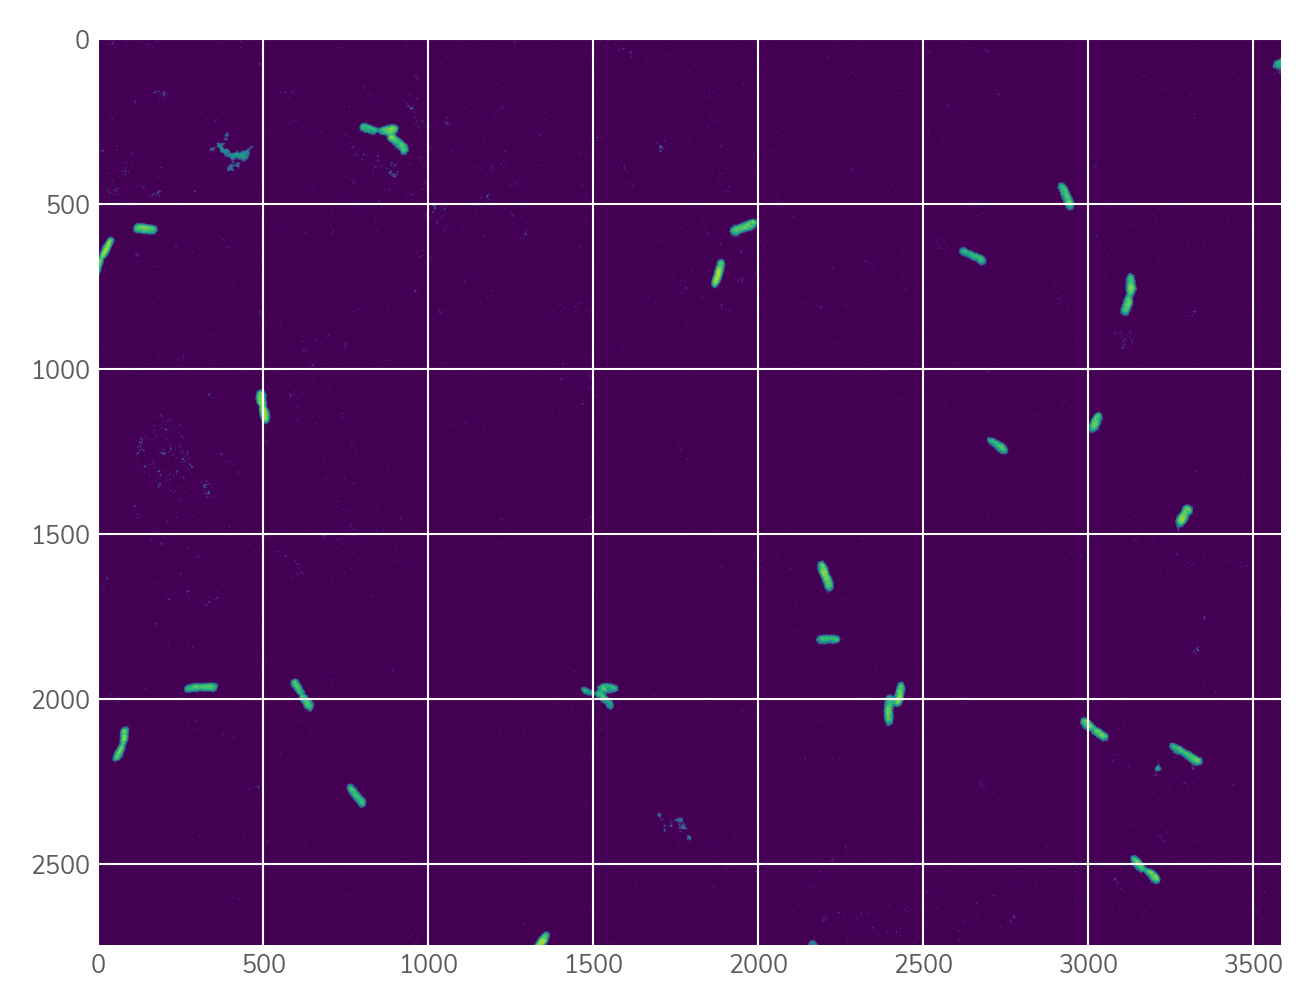

In [20]:
filt = size.image.tophat_filter(crop)
plt.imshow(filt)

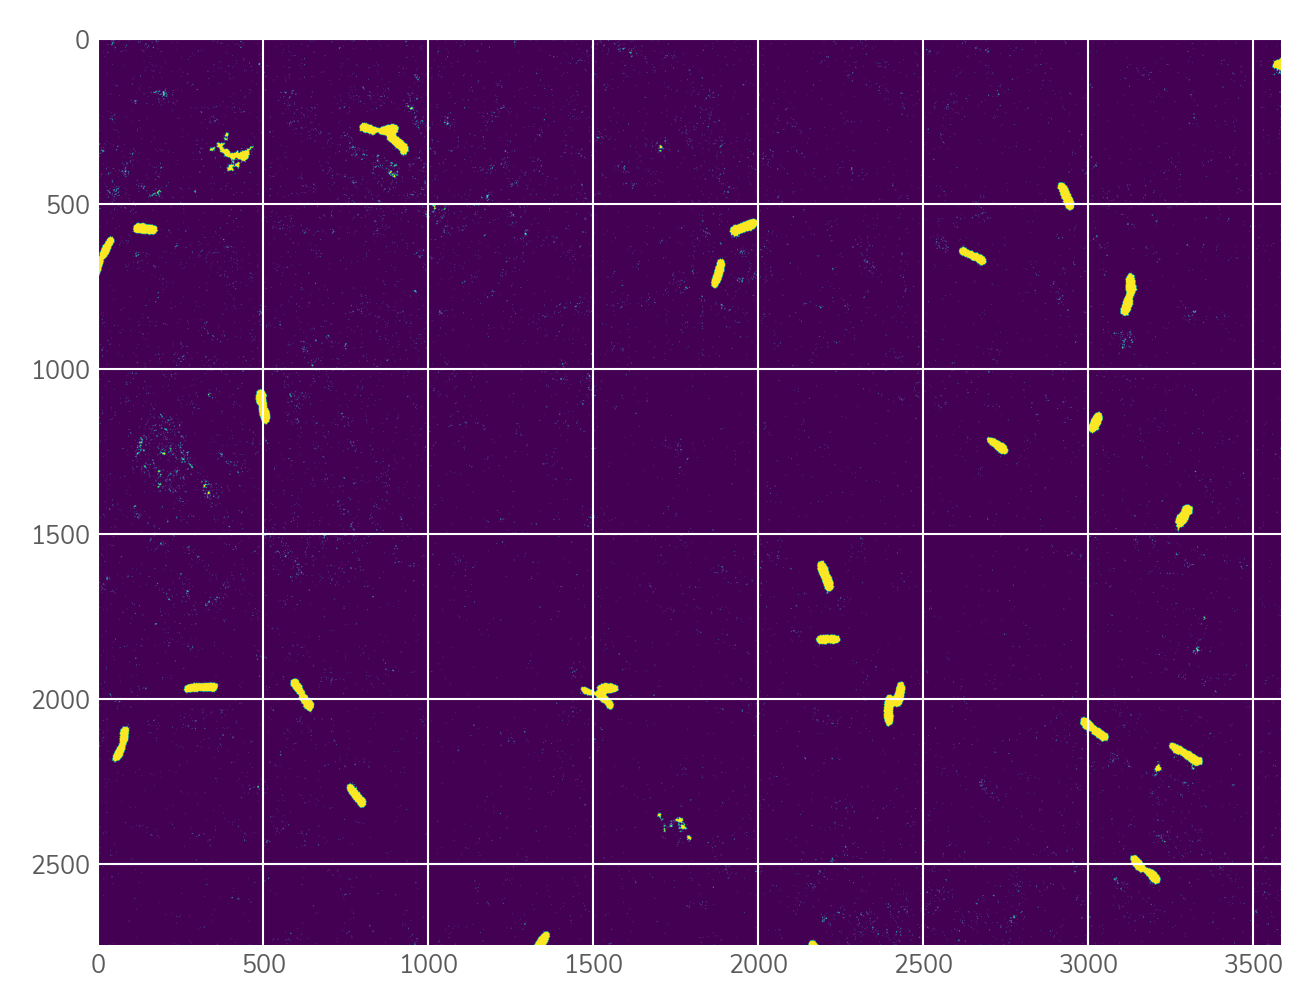

In [17]:
thresh = skimage.filters.threshold_multiotsu(filt)
# thresh
plt.imshow(filt > np.mean(thresh))
# plt.colorbar()

In [250]:

thresh = skimage.filters.threshold_otsu(closing)

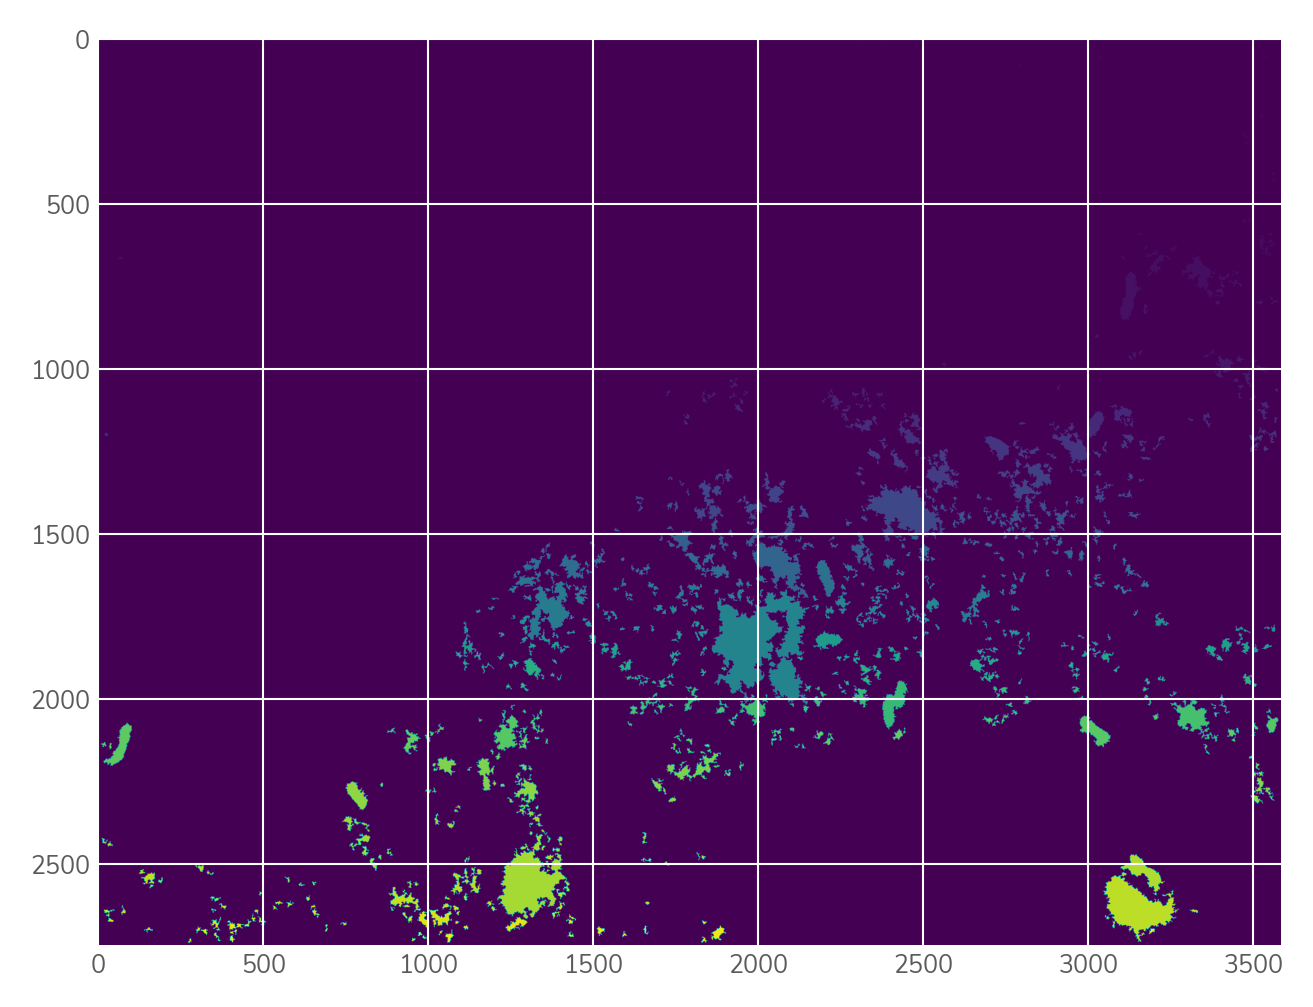

In [7]:
# diff = (closing > thresh) * closing
selem = skimage.morphology.square(2)
dilation_selem = skimage.morphology.disk(4) 
seg = size.image.log_segmentation(filt, radius=1, selem=selem, 
                                  thresh=0.001, median_filt=False, 
                                  label=False)
seg = skimage.morphology.binary_erosion(seg, selem)
seg = skimage.morphology.remove_small_holes(seg)
seg = skimage.morphology.remove_small_objects(seg)
labeled = skimage.measure.label(seg)
plt.imshow(labeled)

In [504]:

objs = np.zeros_like(crop)
props = skimage.measure.regionprops(labeled)
obj_ids = []
bboxes = []
cells = []
contours = pd.DataFrame([])
idx = 0
pad = 10 
for p in tqdm.tqdm(props):
    if ((p.area > 1E3) & (p.area < 5E3))  & (p.solidity > 0.9) & (p.eccentricity > 0.5):
        k = labeled==p.label
        objs += k
        obj_ids.append(p.label)
        padded, _ = pad_bbox(p.bbox, np.shape(labeled), pad=10)
        rot = scipy.ndimage.rotate(labeled[padded]==p.label, -np.rad2deg(p.orientation), order=0) > 0
        rot = skimage.morphology.remove_small_holes(rot)
        rot = skimage.morphology.remove_small_objects(rot)
        rot_intensity = scipy.ndimage.rotate(crop[padded], -np.rad2deg(p.orientation),  mode='nearest')
        relab = skimage.measure.label(rot.astype(int))
        rot_props = skimage.measure.regionprops(relab)
        bbox = rot_props[0].bbox
        s, _  = pad_bbox(bbox, np.shape(rot), pad=10)
        cells.append(rot_intensity[s])
        cont = skimage.measure.find_contours(rot[s], 0)[0]
        cx = scipy.ndimage.uniform_filter(cont[:, 1], 10, mode='wrap')
        cy = scipy.ndimage.uniform_filter(cont[:, 0], 10, mode='wrap') 
        tck, u = scipy.interpolate.splprep([cx, cy], per=1, k=5, s=100)
        unew = np.arange(0, 1.0001, 0.0001)
        out = scipy.interpolate.splev(unew, tck)
        out = [list(out[0]), list(out[1])]
        # Perform median filtering
        dx = np.diff(out[0])
        ddx = np.diff(dx)
        dy = np.diff(out[1])
        ddy = np.diff(dy)
        k = (dx[:-1] * ddy  - dy[:-1] * ddx)/((dx[:-1]**2  + dy[:-1]**2)**(3/2))        
        _df = pd.DataFrame([]) 
        _df['spl_x'] = out[0][:-2]
        _df['spl_y'] = out[1][:-2]
        _df['curvature'] = k
        _df['cell_id'] = idx
        # _df['med_curv'] = med_k
        idx += 1
        contours = pd.concat([contours, _df], sort=False)

  0%|          | 0/133 [00:00<?, ?it/s]/Users/gchure/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][193]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/gchure/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][193]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/gchure/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][151]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/gchure/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][236]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
/Users/gchure/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][236]=x[1][0]
  warnings.warn(Runtime

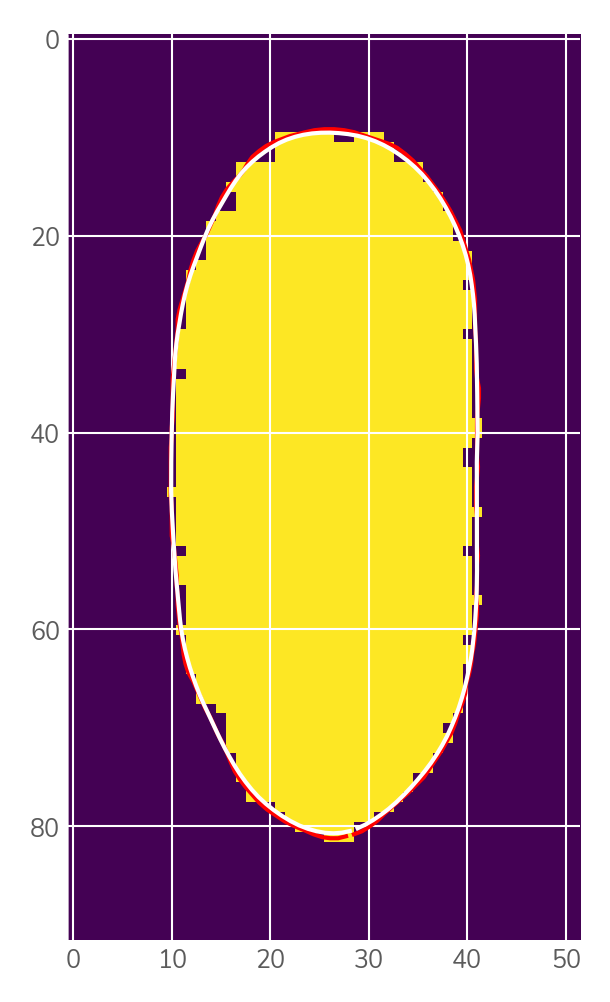

In [505]:
plt.imshow(rot[s])
plt.plot(cx, cy, 'r-', lw=1)
cx_med = scipy.ndimage.uniform_filter(cx, size=10, mode='wrap')
cy_med = scipy.ndimage.uniform_filter(cy, size=10, mode='wrap')
plt.plot(cx_med, cy_med, 'w-', lw=1)

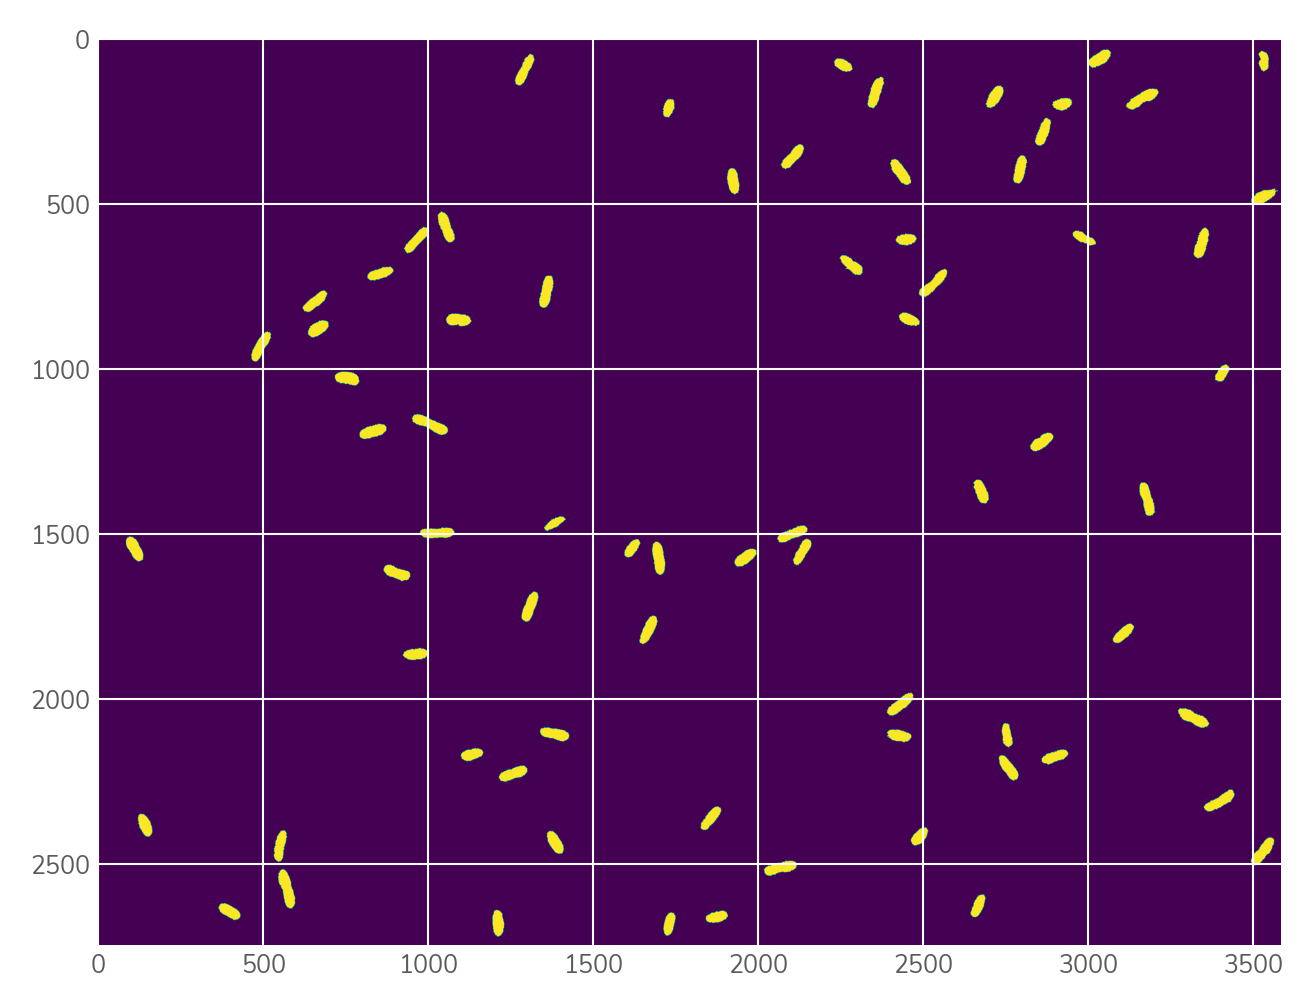

In [506]:
plt.imshow(objs)

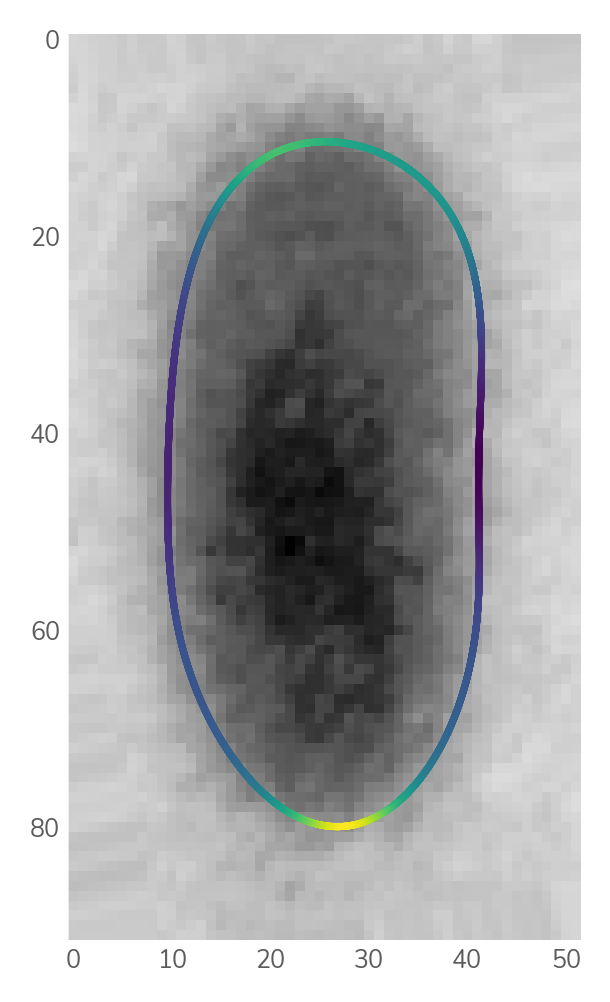

In [507]:
plt.imshow(cells[-1], cmap='Greys_r', vmax=1)
plt.scatter(out[0][:-2], out[1][:-2], c=k, s=2)
plt.grid(False)

Text(0, 0.5, 'length [µm]')

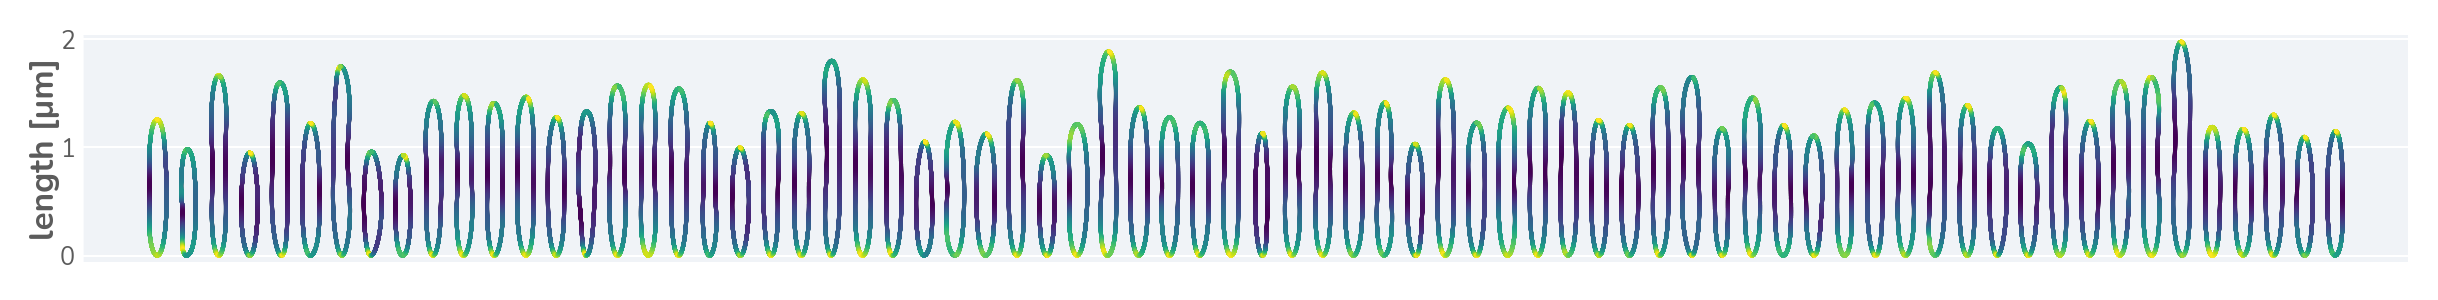

In [508]:
fig, ax = plt.subplots(1,1, figsize=(10, 1))
# ax.axis('equal')
i = 0 
for g, d in contours.groupby('cell_id'):
    ax.scatter((d['spl_x']-d['spl_x'].mean()) + i, (d['spl_y']-d['spl_y'].min()) * 0.0165, c=d['curvature'], s=0.5, alpha=0.5)
    i+= 65
ax.set_xticks([])
ax.set_ylabel('length [µm]')
# plt.savefig('./segmentation_curvature.png')

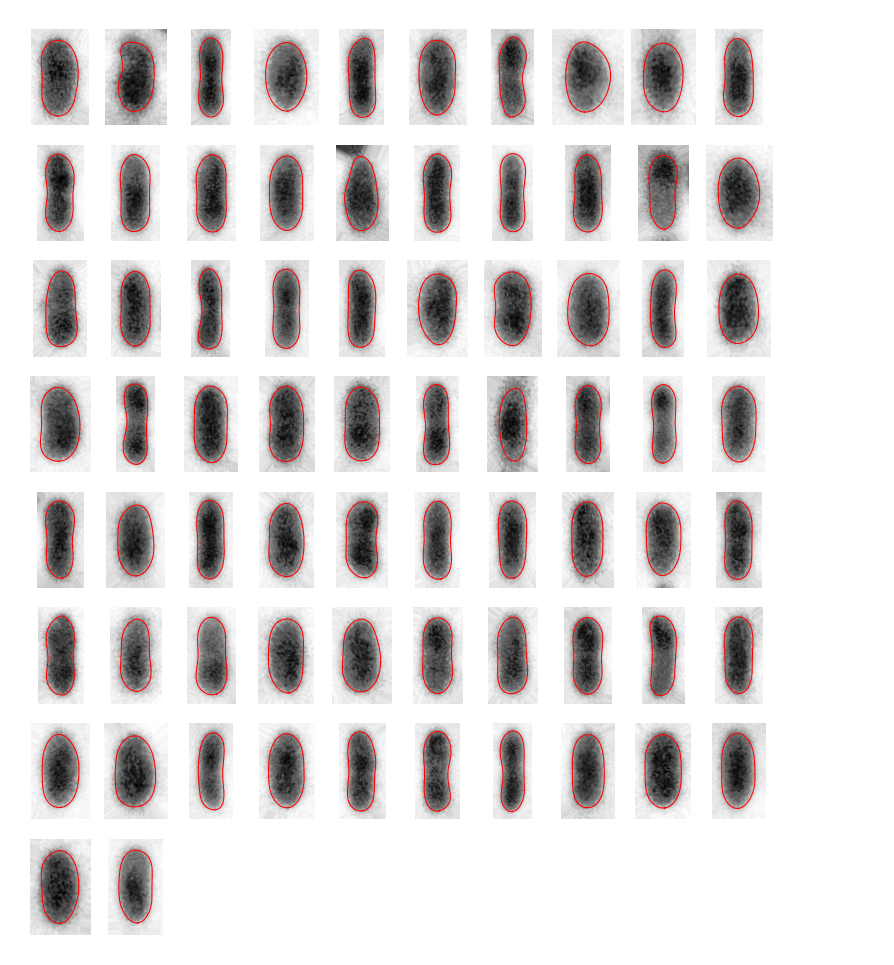

In [509]:
# Determine the number of axes
n_cells = len(cells)
n_cols = 10
n_rows = int(np.ceil(n_cells/n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(4,4))
ax = ax.ravel()
for a in ax:
    a.axis('off')
for i, c in enumerate(cells):
    ax[i].imshow(c, cmap='Greys_r')
for g, d in contours.groupby('cell_id'):
    ax[g].plot(d['spl_x'], d['spl_y'],color='r', lw=0.25) 
plt.subplots_adjust(wspace=-0.7)
plt.savefig('./segmentation_masks.pdf')

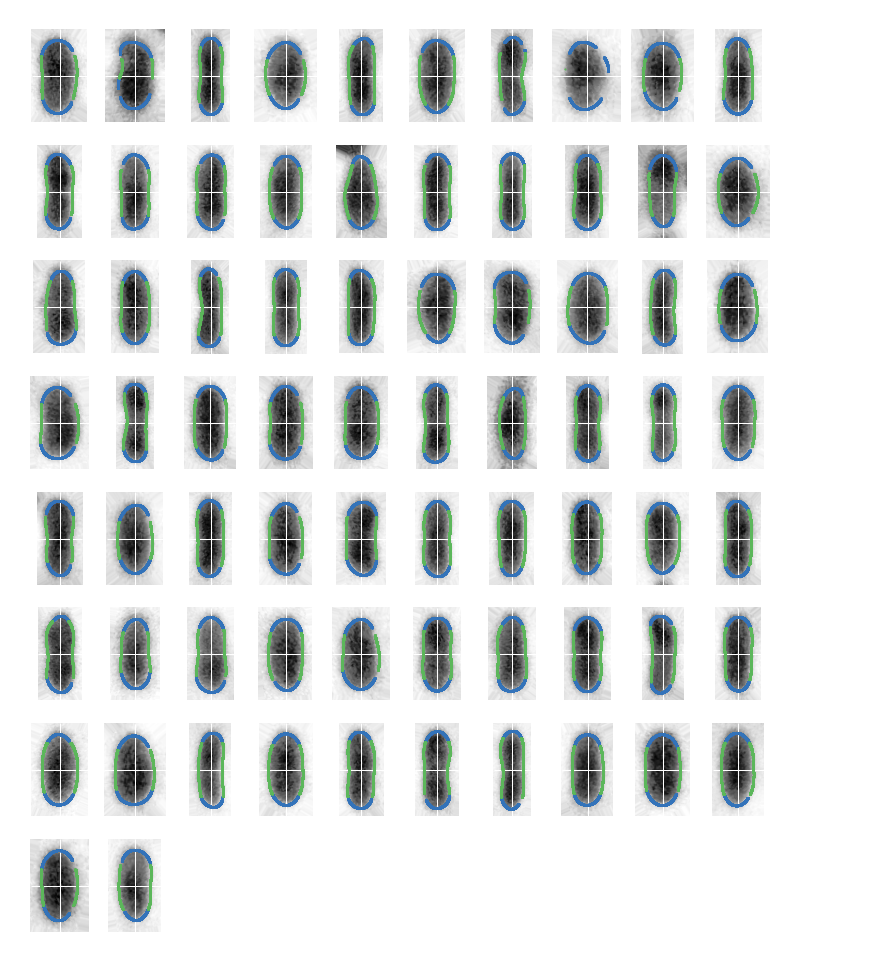

In [514]:
n_cells = len(cells)
n_cols = 10
n_rows = int(np.ceil(n_cells/n_cols))
curve_low = 1/(0.5/0.0167)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(4,4))
ax = ax.ravel()
midplanes = []
for a in ax:
    a.axis('off')
for i, c in enumerate(cells):
    ax[i].imshow(c, cmap='Greys_r')
    cshape = np.shape(c) 
    ax[i].hlines(cshape[0]/2, 0, cshape[1], 'w', linewidth=0.25)
    ax[i].vlines(cshape[1]/2, 0, cshape[0], 'w', linewidth=0.25)
    midplanes.append(cshape[0]/2)
for g, d in contours.groupby('cell_id'):
    # Find the caps
    caps = d[(d['curvature'] >= curve_low)]
    max_x = d['spl_x'].max()
    max_y = d['spl_y'].max()
    # Find the lower cap boundary
    bottom_cap_bound = caps[caps['spl_y'] < (0.5 * max_y)]['spl_y'].max()
    upper_cap_bound = caps[caps['spl_y'] > (0.5 * max_y)]['spl_y'].min()
    sides = d[(d['spl_y'] > bottom_cap_bound) & (d['spl_y'] < upper_cap_bound)]
    # ax[g].plot(sides['spl_x'], sides['spl_y'], '.',color=cor['primary_blue'], ms=1, markeredgewidth=0) 
    ax[g].plot(caps['spl_x'], caps['spl_y'], '.',  color=cor['primary_blue'], ms=1, markeredgewidth=0) 
    ax[g].plot(sides['spl_x'], sides['spl_y'], '.',  color=cor['primary_green'], ms=1, markeredgewidth=0) 
    # ax[g].plot(d['spl_x'][0:1500], d['spl_y'][0:1500], 'w-')
plt.subplots_adjust(wspace=-0.7)
# plt.savefig('./segmentation_masks.pdf')

In [ ]:
def assign_anatomy(data, 
              max_curve=0.5,
              columns = {'groupby' :'cell_id',
                         'curve'   : 'curvature',
                         'x'       : 'spl_x',
                         'y'       : 'spl_y'},
              ip_dist=0.0167 ):

    # Convert supplied curvature threshold to pixel value.
    curve_thresh = ip_dist/max_curve

    df = pd.DataFrame([])  
    for g, d in data.groupby(columns['groupby']):
        # Find the caps
        d = d.copy()
        caps = d[(d[columns['curve']] >= curve_low)].copy()
        max_y = d[columns['y']].max()
        
        # Determine contour points the cell planes
        bottom_cap_bound = caps[(caps[columns['y']] - caps[columns['y']].mean() ) < 0 ][columns['y']].max()
        upper_cap_bound = caps[(caps[columns['y']] - caps[columns['y']].mean() ) > 0 ][columns['y']].min()

        # Label caps as top and bottom
        caps['component'] = 'bottom'
        caps.loc[d[columns['y'] > bottom_cap_bound], 'component'] = 'top'

        # Find and label edges as left and right
        sides = d[(d[columns['y']] > bottom_cap_bound) & (d[columns['y']] < upper_cap_bound)].copy()
        sides['component'] = 'right'
        sides.loc[(sides[columns['x']] - sides[columns['x']].mean()) < 0, 
                'component'] = 'left'
        df = pd.concat([df, caps, sides], sort=False)
    return df

def measure_biometrics(data,                       
                       peri_width=0.025,
                       ip_dist = 0.0167,
                       columns = {'groupby' :'cell_id',
                                  'curve'   : 'curvature',
                                  'x'       : 'spl_x',
                                  'y'       : 'spl_y',
                                  'component': 'component'}):
    """
    Computes properties of cells with assigned anatomy.  
    """
    #TODO. Better way to calculate this length. maximize distance between sides 
    # connecting poles.
        
    # Compute width properties
    biometrics = pd.DataFrame([])
    for g, d in data.groupby(data[columns['groupby']]):
        # Make measurements
        length = (d[columns['y']].max() - d[columns['y']].min()) * ip_dist
        left = d[columns['component']=='left'][columns['y']].values
        right = d[columns['component']=='right'][columns['x']].values
        width = [np.min(rval - left) * ip_dist for rval in right] 
        width_mean = np.mean(width)
        width_var  = np.var(width)

        # Compute features 
        vol = size.analytical.volume(length, width_mean)
        sa = size.analytical.surface_area(length, width_mean)
        sav = sa / vol
        env_vol = size.analytical.envelope_volume(length, width_mean, peri_width)
        frac_vol = env_vol / vol

        # Assemble dataframe
        _df = pd.DataFrame([])
        _df['length'] = length
        _df['width_mean'] = width_mean
        _df['width_var'] = width_var
        _df['volume'] = vol
        _df['surface_area'] = sa
        _df['surface_to_volume'] = sav
        _df['periplasm_volume'] = env_vol
        _df['periplasm_fractional_volume'] = env_vol / vol
        _df[columns['groupby']] = g
        biometrics = pd.concat([_df, biometrics])
    return biometrics



In [299]:
len(caps['spl_y'])

5070

# Turning it into a function


In [ ]:
def tophat_filter(image, 
                  large_selem_diam=50, 
                  small_selem_diam=2,
                  threshold='otsu'):
    """
    Performs a series of tophat transforms to amplify phase contrast images for 
    segmentation

    Parameters
    ==========
    image : 2d-array
        The phase contrast image to be filtered. 
    large_selem_diam : int
        The diameter of the large disk structuring element used in generating the 
        black tophat transform. Default is 50 pixels.
    small_selem_diam : int
        The diameter of the small disk structuring element used in generating the 
        white tophat transform. Default is 2 pixels.
    threshold: str or float
        Threshold used for rough segmentation of cells. If of type `float`, 
        provided value is used. If `otsu`, Otsu's method is used. if 'none',
        no thresholding is applied.

    Returns 
    ========
    closed_image : 2d-array
        The filtered and thresholded (if desired) image. 
    """

    # Normalize the image. 
    im_norm = (image - image.min()) / (image.max() - image.min())

    # Perform background subtraction to correct of uneven illumination
    im_blur = skimage.filters.gaussian(image, 30)
    im_sub = im_norm - im_blur

    # Define structuring elements
    lg_selem = skimage.morphology.disk(large_selem_diam)
    sm_selem = skimage.morphology.disk(small_selem_diam)

    # Perform filtering and closing operations
    blk_tophat = skimage.morphology.black_tophat(im_sub, lg_selem)
    wht_tophat = skimage.morphology.white_tophat(blk_tophat, lg_selem)
    closing = scipy.ndimage.grey_closing(wht_tophat, footprint=sm_selem)

    if threshold == 'otsu':
        thresh = skimage.filter.threshold_otsu(closing)
    elif threshold == 'none':
        return closing
    else:
        thresh = skimage.filter.threshold_otsu(closing)
    return closing * (closing > thresh)

In [532]:
def contour_segmentation(image, 
                         filter=True,
                         area_bounds=(10, 100),
                         ecc_bound=0.5,
                         solidity_bound=0.9,
                         ip_dist=0.0167,
                         return_mask=False,
                         return_cells=False,
                         **filter_kwargs):
    """
    Segments an image using Laplacian of Gaussian then computes smoothed contours 
    of segmented objects. Contour curvature is also computed. 

    Parameters
    ==========
    image : 2d-array
        The image with dark cells to be segmented. 
    filter : bool
        If True, tophat filters will be applied with the supplied kwargs.
    area_bounds : tuple of positive floats 
        The bounds in 2d-projected cell area between which cells are accepted. 
        This must be in the same units as the interpixel distance. Default is
        between 10 and 100 square microns. 
    ecc_bound : positive_float
        Object eccentricity below which objects should be discarded.
        Default is 0.5
    solidity_bound : positive float
        The solidity below chich objects should be discarded. Solidity is 
        defined as the area fraction of the convex hull that is occupied by 
        the object. Default is 0.9.
    ip_dist : float
        The interpixel distance in the same units as `area_bounds`. Default is 
        0.0167 microns per pixel
        TODO: Give more information.
    return_mask : bool
        If True, a mask of segmented objects is returned.
    return_cells : bool
        If True, a dict is compiled containing the cropped segmentation mask 
        and the cropped intensity image. 

    Returns 
    ========
    objects :  pandas DataFrame
        A pandas DataFrame with information regarding  each successfully 
        segmented object.
    mask : 2d-array of ints
        The object segmentation mask after object filtering.  This is only 
        returned if `return_mask == True`.
    cells : dict of dicts
        A dictionary with each segmentation and intensity image for each cell,
        rotated to be aligned. This is only returned if `return_cells==True`.
    """
    if filter:
        _image = tophat_filter(image, **tophat_kwargs)
    else:
        _image = image
    # Perform the laplacian of gaussian segmentation
    log_selem = skimage.morphology.square(2)
    seg = size.image.log_segmentation(image, radius=1, selem=log_selem, 
                                      thresh=0.001, median_filt=False, 
                                      label=False)
    # Clean up the mask and label
    seg = skimage.morphology.binary_erosion(seg, selem)
    seg = skimage.morphology.remove_small_holes(seg)
    seg = skimage.morphology.remove_small_objects(seg)
    labeled = skimage.measure.label(seg)

    # Compute properties and create storage objects
    mask = np.zeros_like(image)
    props = skimage.measure.regionprops(labeled)
    cell_images = {}
    objects = pd.DataFrame([])

    # Iterate through each segmented object
    idx = 0
    for p in tqdm.tqdm(props):
        if ((p.area >= area_bounds[0]/ip_dist) & (p.area < area_bounds[1]/ip_dist)) &\
            (p.solidity > solidity_bound) & (p.eccentricity > ecc_bound):
            # Update the mask
            mask += labeled==p.label
            # Crop the original object and rotate.
            padded, _ = pad_bbox(p.bbox, np.shape(labeled), pad=10)
            rot = scipy.ndimage.rotate(labeled[padded]==p.label, -np.rad2deg(p.orientation), order=0) > 0
            rot = skimage.morphology.remove_small_holes(rot)
            rot = skimage.morphology.remove_small_objects(rot)
            relab = skimage.measure.label(rot.astype(int))
            if return_cells:
                rot_int = scipy.ndimage.rotate(_image, -np.rad2deg(p.orientation), order=0)
                rot_props = skimage.measure.regionprops(relab, intensity_image=rot_int)
            else:
                rot_props = skimage.measure.regionprops(relab)
            bbox = rot_props[0].bbox
            rot_pad, _ = pad_bbox(bbox, np.shape(rot), pad=10)
            
            # If an intensity image is desired, also rotate
            if return_cells:
                rot_intensity = scipy.ndimage.rotate(image[padded], -np.rad2deg(p.orientation),  mode='nearest')
                cell_images[idx] = {'intensity_image':rot_intensity[rot_pad],
                                    'segmentation_mask':rot[rot_pad]}                
            # Find contours and perform a uniform filtering of indices
            cont = skimage.measure.find_contours(rot[rot_pad], 0)[0]
            cx = scipy.ndimage.uniform_filter(cont[:, 1], 10, mode='wrap')
            cy = scipy.ndimage.uniform_filter(cont[:, 0], 10, mode='wrap')  

            # Compute the spline.
            tck, u = scipy.interpolate.splprep([cx, cy], per=1, k=5, s=100)
            unew = np.arange(0, 1.0001, 0.0001)
            out = scipy.interpolate.splev(unew, tck)

            # Compute the curvature and assemble the dataframe
            k = compute_curvature(out)
            _df = pd.DataFrame([]) 
            _df['x_coords'] = out[0][:-2]
            _df['y_coords'] = out[1][:-2]
            _df['curvature'] = k
            _df['cell_id'] = idx
            _df.dropna(inplace=True)
            objects = pd.concat([objects, _df], sort=False)
            # Update the cell counter
            idx += 1
            
    # Determine what needs to be returned
    out = [objects]
    if return_mask:
        out.append(mask)
    if return_cells:
        out.append(cells)
    if len(out) == 1:
        out = out[0]
    return out
    

In [453]:
def pad_bbox(bbox, dims, pad=10):
    """
    Compute a slice object that pads a bounding box. 

    Parameters
    ==========
    bbox : tuple
        The coordinates of the bounding box `(min_row, min_col, max_row, max_col)`.
    dims : tuple
        The dimensions of the original image to avoid overshoot of new bounding 
        box
    pad : int
        The number of pixels to add to each side of the bounding box. Default 
        is 10 pixels.
    
    Returns
    =======
    bbox_new :  (numpy slice object, padded_bbox)
        New bbox as a tuple of a slice index and new bbox coordinates)
    """
    x_lower = [bbox[0]-pad if (bbox[0] - pad) >= 0 else bbox[0]][0] 
    x_upper = [bbox[2]+pad if (bbox[2] + pad) <= dims[0]  else bbox[2]][0]
    y_lower = [bbox[1]-pad if (bbox[1] - pad) >= 0 else bbox[1]][0]
    y_upper = [bbox[3]+pad if (bbox[3] + pad) <= dims[1]  else bbox[3]][0]
    padded_bbox = (x_lower, y_lower, x_upper, y_upper)
    return [np.s_[x_lower:x_upper, y_lower:y_upper], padded_bbox]

In [526]:
def compute_curvature(arr):
    # Pad the entry of each array to allow for boundary conditions
    dx = np.diff(arr[0])
    ddx = np.diff(dx)
    dy = np.diff(arr[1])
    ddy = np.diff(dy)
    k = (dx[:-1] * ddy  - dy[:-1] * ddx)/((dx[:-1]**2  + dy[:-1]**2)**(3/2))     
    return k

In [401]:
np.s_[10:10, 10:10]

(slice(10, 10, None), slice(10, 10, None))

In [407]:
pad_bbox(bbox, np.shape(rot), pad=10)

[(slice(446, 542, None), slice(1665, 1722, None)), (446, 1665, 542, 1722)]